In [3]:
initial_path = 'peptide-QML'
initial_path = '..'

In [152]:
import numpy as np

In [4]:
import sys
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c
from my_code import pytorch_model as m
from my_code import quantum_nodes as q

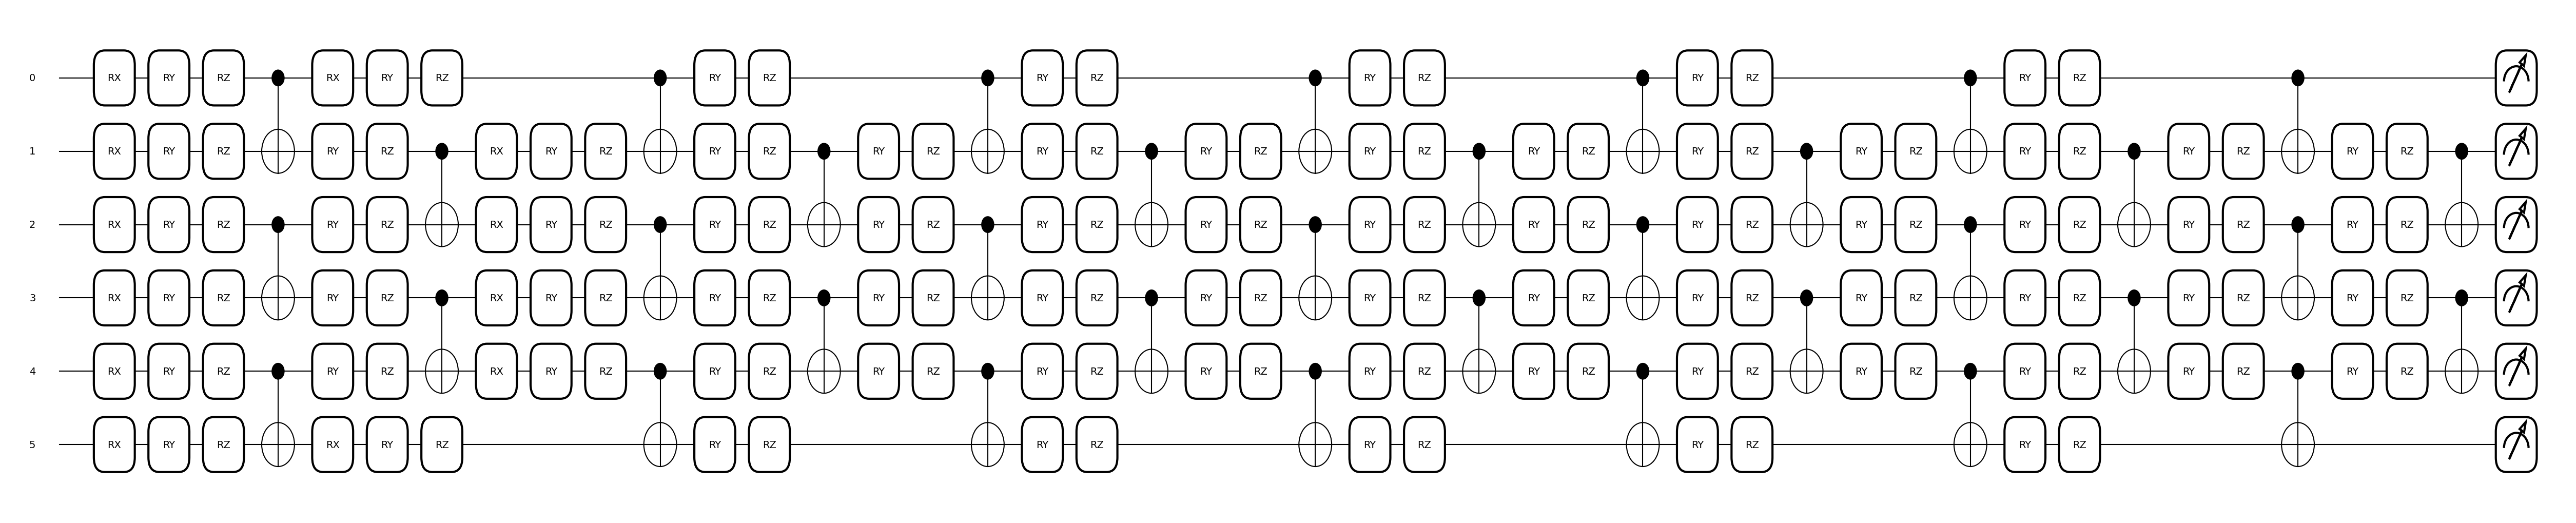

In [5]:
# -- QUANTUM BLOCK -- #
n_qubits = 6
quantum_layer = q.circuit(
    n_qubits = n_qubits, 
    device = "default.qubit.torch",
    device_options = {'shots': None},
    embedding = q.parts.AngleEmbedding,
    embedding_ansatz = q.parts.Ansatz_11,
    block_ansatz = q.parts.Ansatz_11,
    final_ansatz = q.parts.Ansatz_11, # TODO CHECK IF THIS IS THE BEST OPTION
    measurement = q.parts.Measurement('Z', 'all'),
    embedding_n_layers = 1,
    different_inputs_per_layer = True,
    block_n_layers = 5,
    # wrapper_qlayer = pw.QLayerEmpty,
)

quantum_layer.draw(size=(50, 10))

In [8]:
quantum_layer.input_shape

(12,)

In [10]:
class Model(m.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = quantum_layer()            

    def forward(self, x):
        return self.fc1(x)

model = Model()

In [12]:
import torch
model(torch.tensor([1 for _ in range(12)]))

tensor([0, 0, 0, 0, 0, 0])

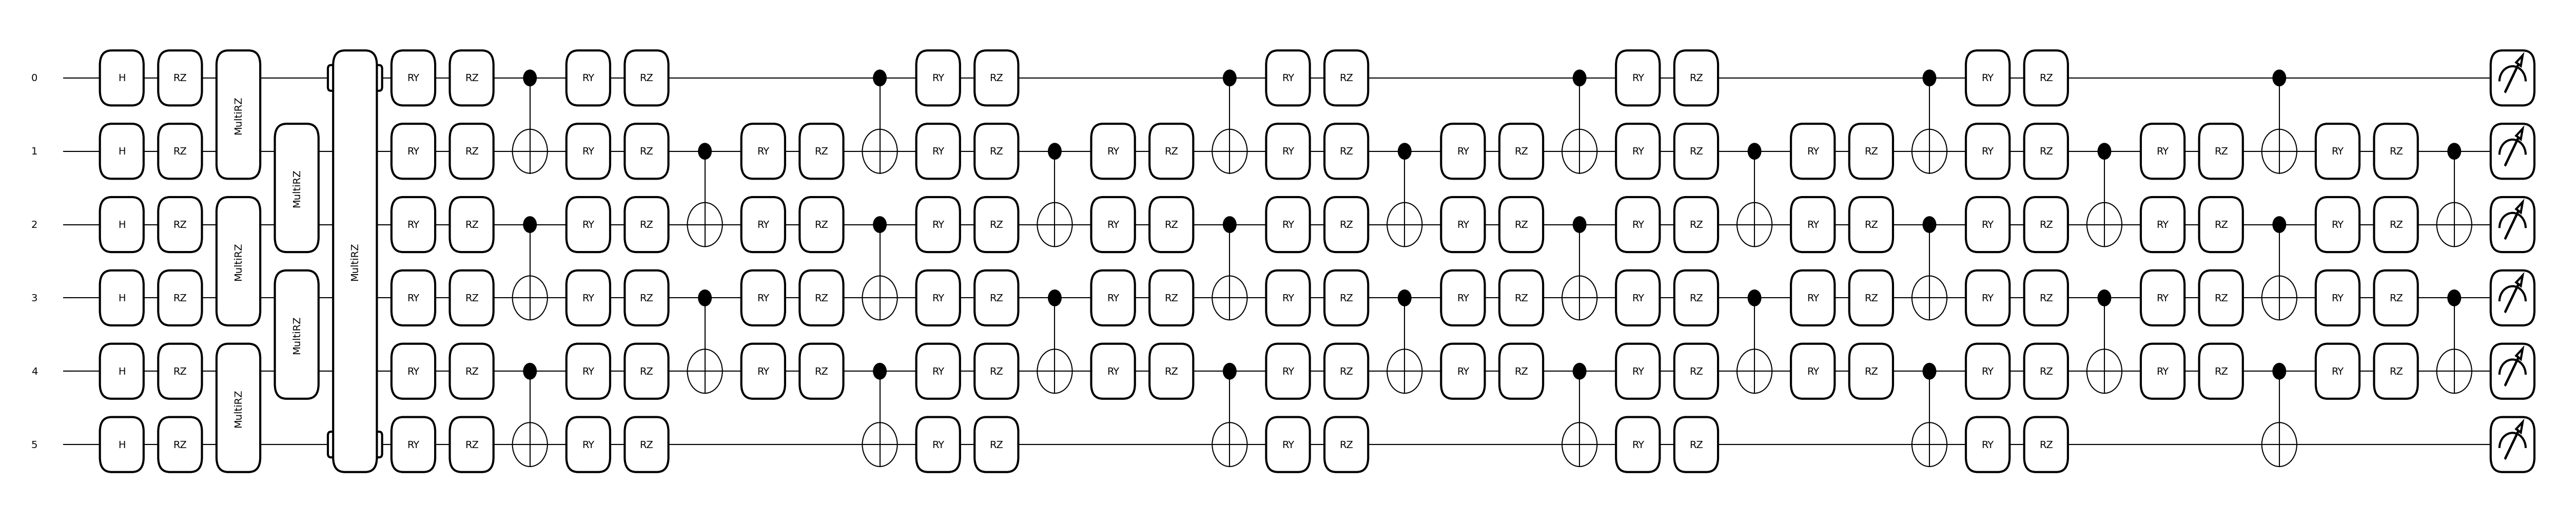

In [6]:


# -- QUANTUM BLOCK -- #
n_qubits = 6
quantum_layer = q.circuit(
    n_qubits = n_qubits, 
    device = "default.qubit.torch",
    device_options = {'shots': None},
    embedding = q.parts.IQPEmbedding({
        'n_repeats': 1,
        'pattern': [[0,1], [2,3], [4,5], [1,2], [3,4], [5,0]]
    }),
    # embedding_ansatz = q.parts.Ansatz_11,
    block_ansatz = q.parts.Ansatz_11,
    final_ansatz = q.parts.Ansatz_11, # TODO CHECK IF THIS IS THE BEST OPTION
    measurement = q.parts.Measurement('Z', 'all'),
    # embedding_n_layers = sweep_point['embedding_n_layers'],
    # different_inputs_per_layer = True,
    block_n_layers = 5,
    # wrapper_qlayer = pw.QLayerEmpty,
)

quantum_layer.draw(size=(50, 10))



ValueError: State vector must have shape (2**wires,) or (batch_size, 2**wires).

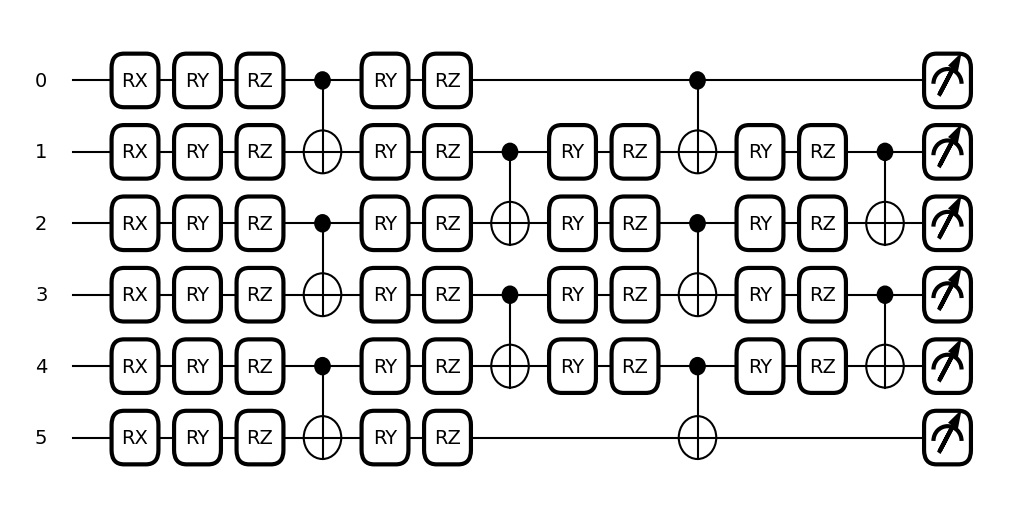

In [310]:


# -- QUANTUM BLOCK -- #
n_qubits = 6
quantum_layer = q.circuit(
    n_qubits = n_qubits, 
    device = "default.qubit.torch",
    device_options = {'shots': None},
    # embedding = q.parts.IQPEmbedding({
    #     'n_repeats': 1,
    #     'pattern': [[0,1], [2,3], [4,5], [1,2], [3,4], [5,0]]
    # }),
    embedding = q.parts.AngleEmbedding,
    # embedding_ansatz = q.parts.Ansatz_11,
    block_ansatz = q.parts.Ansatz_11,
    final_ansatz = q.parts.Ansatz_11, # TODO CHECK IF THIS IS THE BEST OPTION
    measurement = q.parts.Measurement('Z', 1),
    # embedding_n_layers = sweep_point['embedding_n_layers'],
    # different_inputs_per_layer = True,
    block_n_layers = 1,
    # wrapper_qlayer = pw.QLayerEmpty,
)

quantum_layer.draw(size=(10, 5))
quantum_layer.draw(size=(10, 5), inverse=True)


In [297]:
weights = tuple(np.random.rand(shape[0]) for shape in quantum_layer.weights_shape.values())

In [313]:
inp = [0.4008816283907662, 1.7038082840289468, 1.5555102854324172, 1.5643953568189872, 1.643624632004859, 1.7307856916794242]


out = quantum_layer.qnode(inp, *weights)

out

tensor([-2.0273e-02+7.3213e-02j, -1.6301e-01+6.5810e-02j,
        -5.1980e-02-2.0494e-01j, -1.6346e-01-1.6505e-01j,
         2.2856e-01-1.4487e-01j,  3.0870e-02-7.9156e-02j,
         6.2459e-02-4.6801e-02j,  8.6687e-02+1.2286e-03j,
         1.1021e-02-7.6807e-02j,  9.4359e-02-7.2192e-02j,
         7.7664e-02-1.0049e-01j,  4.9180e-02-4.5654e-03j,
        -7.6254e-02+1.3791e-01j, -2.1770e-02+1.2215e-01j,
         3.6468e-02+1.4123e-02j,  4.8966e-02+7.4177e-02j,
        -5.6112e-02-1.1398e-01j,  8.4997e-02-2.1756e-01j,
         1.3433e-01-6.0371e-02j,  1.9057e-01-3.3337e-02j,
         2.4161e-01-2.3786e-01j,  7.1296e-02-1.5245e-01j,
         7.3594e-03-7.5503e-02j,  5.2121e-02-1.0295e-01j,
         1.6678e-01-6.4741e-03j,  2.0402e-01+2.2146e-01j,
        -9.4520e-04+1.3640e-01j, -8.8554e-02+2.1865e-01j,
        -1.8751e-02-7.3706e-02j,  1.1886e-01-8.8802e-02j,
        -1.2579e-01-5.1483e-02j, -6.7549e-02-2.2082e-01j,
         4.1378e-02-4.6669e-02j,  1.2263e-01-2.2164e-04j,
         3.632

In [314]:
x = quantum_layer.qnode_inverse(out, *weights)

print(x)
print([np.arccos(i).item() for i in x])

[tensor(0.9207), tensor(-0.1326), tensor(0.0153), tensor(0.0064), tensor(-0.0728), tensor(-0.1593)]
[0.40088162839076474, 1.703808284028947, 1.5555102854324176, 1.5643953568189874, 1.6436246320048593, 1.7307856916794244]


(array([0.32732684, 0.54554473, 0.10910895, 0.76376262]),
 tensor([0.32732684+0.j, 0.54554473+0.j, 0.10910895+0.j, 0.76376262+0.j], requires_grad=True))

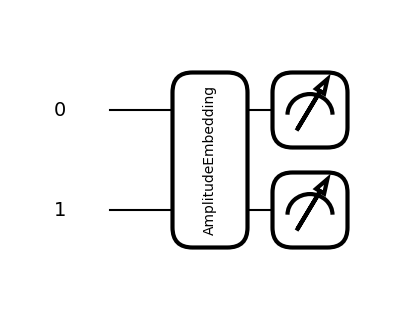

In [140]:
import pennylane as qml
import numpy as np

n_qubits = 2
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(inputs):

    qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), normalize=True)

    return qml.state()

qml.draw_mpl(circuit)([1 for _ in range(2**n_qubits)])

x = [0.3, 0.5, 0.1, 0.7]
normalized = x / np.linalg.norm(x)
normalized, circuit(normalized)

In [137]:
x = np.array([1, 0, 1, 0])
# print normalised vector
print(x / np.linalg.norm(x))

[0.70710678 0.         0.70710678 0.        ]


[tensor(0., requires_grad=True), tensor(-0.2, requires_grad=True), tensor(0.45, requires_grad=True)]


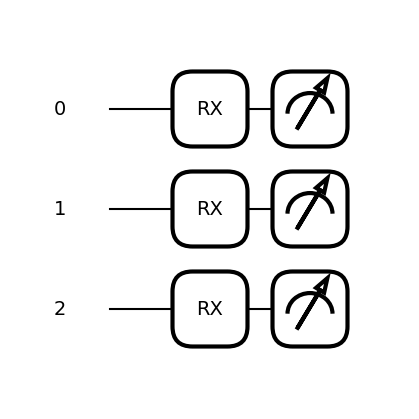

In [142]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def circuit(inputs):

    [qml.RX(np.arccos(inputs[i]), wires=i) for i in range(n_qubits)]

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

qml.draw_mpl(circuit)((1,1,1))

print(circuit((0,-0.2, 0.45)))


In [291]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def circuit(inputs):

    [qml.RX(inputs[i], wires=i) for i in range(n_qubits)]
    [qml.RZ(inputs[i], wires=i) for i in range(n_qubits)]
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[0,2])
    qml.adjoint(qml.CNOT(wires=[0,2]))
    qml.adjoint(qml.CNOT(wires=[0,1]))
    [qml.adjoint(qml.RZ(inputs[i], wires=i)) for i in range(n_qubits)]
    [qml.adjoint(qml.RX(inputs[i], wires=i)) for i in range(n_qubits)]

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

print(qml.draw(circuit)((1,1,1)))

print(circuit((0.6,-0.2, 0.45)))

0: ──RX(1.00)──RZ(1.00)─╭●─╭●─╭●──╭●──────────RZ(1.00)†──RX(1.00)†─┤  <Z>
1: ──RX(1.00)──RZ(1.00)─╰X─│──│───╰X†─────────RZ(1.00)†──RX(1.00)†─┤  <Z>
2: ──RX(1.00)──RZ(1.00)────╰X─╰X†──RZ(1.00)†──RX(1.00)†────────────┤  <Z>
[tensor(1., requires_grad=True), tensor(1., requires_grad=True), tensor(1., requires_grad=True)]
